In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_q(nm, wavelength, theta):
    """
    Returns the q-value of a given theta
    """
    return (4 * np.pi * nm) / wavelength * np.sin(theta / 2)

def get_qs(nm, wavelength, theta):
    """
    Returns the q-value of a given theta
    """
    return (2 * np.pi * nm) / wavelength

def form_factor_sphere(r, theta = 90, wavelength = 532, nm = 1.33):
    """
    Returns the form factor of a sphere
    """
    q = get_q(nm, wavelength, theta)

    return 3 / (q*r)**3 * (np.sin(q*r) - q*r*np.cos(q*r))

In [3]:
r_1 = np.linspace(0.1, 250, 501) 
r_2 = np.linspace(0.1, 150, 501) 
r_3 = np.linspace(0.1, 300, 501) 

wavelength=532 #Wavelength in nanometers
theta1 = 1
theta2 = 90
theta3 = 180

x_sphere_1 = form_factor_sphere(r_1, theta1, wavelength=wavelength) 
x_sphere_2 = form_factor_sphere(r_2, theta2, wavelength=wavelength)
x_sphere_3 = form_factor_sphere(r_3, theta3, wavelength=wavelength)

#Norm
XNs_1 = np.array([np.linalg.norm(x) for x in x_sphere_1]) #Norm sphere
XNs_2 = np.array([np.linalg.norm(x) for x in x_sphere_2])
XNs_3 = np.array([np.linalg.norm(x) for x in x_sphere_3])

#Squared norm
XNSs_1 = XNs_1**2  #Norm Squared sphere 
XNSs_2 = XNs_2**2
XNSs_3 = XNs_3**2

In [4]:
theta = np.linspace(0.01, np.pi, 251)

r_fixed1 = 50
r_fixed2 = 150
r_fixed3 = 300


theta_1 = np.linspace(0.1 ,180 , 251)
theta_2 = np.linspace(0.1 ,180 , 251)
theta_3 = np.linspace(0.1 ,180 , 251)

y_sphere_1 = form_factor_sphere(r_fixed1, theta, wavelength=wavelength)
y_sphere_2 = form_factor_sphere(r_fixed2, theta, wavelength=wavelength)
y_sphere_3 = form_factor_sphere(r_fixed3, theta, wavelength=wavelength)


#Squared
XSsa_1 = y_sphere_1**2
XSsa_2 = y_sphere_2**2
XSsa_3 = y_sphere_3**2


#Norm
XNsa_1 = np.array([np.linalg.norm(x) for x in y_sphere_1])
XNsa_2 = np.array([np.linalg.norm(x) for x in y_sphere_2])
XNsa_3 = np.array([np.linalg.norm(x) for x in y_sphere_3])




## Form factor(abs) vs Angle

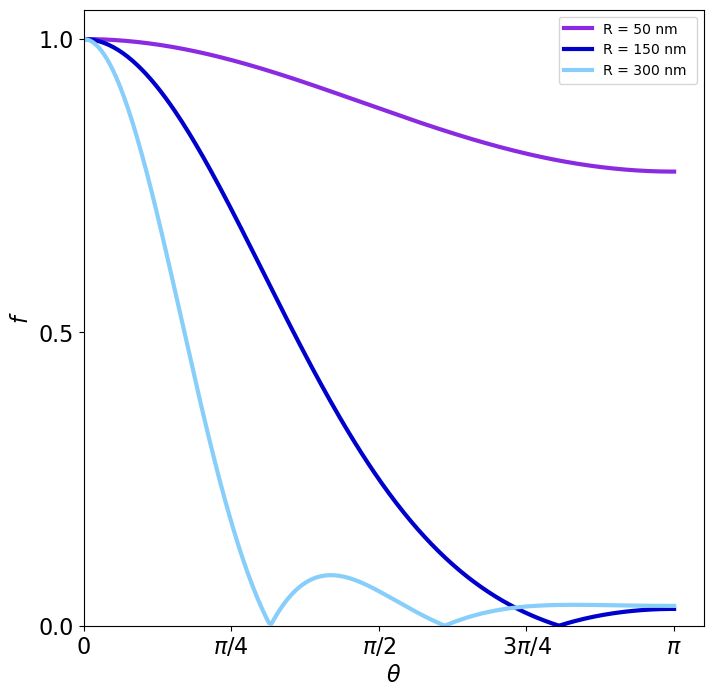

In [5]:

fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(theta, XNsa_1, color = 'blueviolet', linewidth = 3)
axes.plot(theta, XNsa_2, color = 'mediumblue', linewidth = 3)
axes.plot(theta, XNsa_3, color = 'lightskyblue', linewidth = 3)



axes.set_xlabel('$\\theta$', fontsize=16)
axes.set_ylabel('$f$', fontsize=16)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_xticks([0, np.pi/4, np.pi/2, 3/4 * np.pi, np.pi])
axes.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize = 16)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
plt.legend(['R = 50 nm', 'R = 150 nm ','R = 300 nm']) 
